## New approch to improve the prediction scores. 

In [36]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [37]:
#This dataset is taken from https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
df=pd.read_csv("OnlineNewsPopularity.csv")

In [38]:
df.columns

Index([u'url', u' timedelta', u' n_tokens_title', u' n_tokens_content',
       u' n_unique_tokens', u' n_non_stop_words', u' n_non_stop_unique_tokens',
       u' num_hrefs', u' num_self_hrefs', u' num_imgs', u' num_videos',
       u' average_token_length', u' num_keywords',
       u' data_channel_is_lifestyle', u' data_channel_is_entertainment',
       u' data_channel_is_bus', u' data_channel_is_socmed',
       u' data_channel_is_tech', u' data_channel_is_world', u' kw_min_min',
       u' kw_max_min', u' kw_avg_min', u' kw_min_max', u' kw_max_max',
       u' kw_avg_max', u' kw_min_avg', u' kw_max_avg', u' kw_avg_avg',
       u' self_reference_min_shares', u' self_reference_max_shares',
       u' self_reference_avg_sharess', u' weekday_is_monday',
       u' weekday_is_tuesday', u' weekday_is_wednesday',
       u' weekday_is_thursday', u' weekday_is_friday', u' weekday_is_saturday',
       u' weekday_is_sunday', u' is_weekend', u' LDA_00', u' LDA_01',
       u' LDA_02', u' LDA_03', u' LD

In [39]:
del df['url']
del df[' timedelta']

In [40]:
df.columns

Index([u' n_tokens_title', u' n_tokens_content', u' n_unique_tokens',
       u' n_non_stop_words', u' n_non_stop_unique_tokens', u' num_hrefs',
       u' num_self_hrefs', u' num_imgs', u' num_videos',
       u' average_token_length', u' num_keywords',
       u' data_channel_is_lifestyle', u' data_channel_is_entertainment',
       u' data_channel_is_bus', u' data_channel_is_socmed',
       u' data_channel_is_tech', u' data_channel_is_world', u' kw_min_min',
       u' kw_max_min', u' kw_avg_min', u' kw_min_max', u' kw_max_max',
       u' kw_avg_max', u' kw_min_avg', u' kw_max_avg', u' kw_avg_avg',
       u' self_reference_min_shares', u' self_reference_max_shares',
       u' self_reference_avg_sharess', u' weekday_is_monday',
       u' weekday_is_tuesday', u' weekday_is_wednesday',
       u' weekday_is_thursday', u' weekday_is_friday', u' weekday_is_saturday',
       u' weekday_is_sunday', u' is_weekend', u' LDA_00', u' LDA_01',
       u' LDA_02', u' LDA_03', u' LDA_04', u' global_subjec

In [41]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [42]:
df.rename(columns=lambda x:x[1:], inplace=True)

In [43]:
df.columns

Index([u'n_tokens_title', u'n_tokens_content', u'n_unique_tokens',
       u'n_non_stop_words', u'n_non_stop_unique_tokens', u'num_hrefs',
       u'num_self_hrefs', u'num_imgs', u'num_videos', u'average_token_length',
       u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sentiment_polarity', u'gl

In [44]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


We can see that the mean of the shares is 1400, let's just say that news which has shares above 1400 are popular and below are not so.

references: http://cs229.stanford.edu/proj2015/328_report.pdf

In [45]:
##references http://stackoverflow.com/questions/27041724/using-conditional-to-generate-new-column-in-pandas-dataframe
def shareC(c):
    if c['shares'] > 1400:
        return 1
    elif c['shares'] <= 1400:
        return 0
  

In [46]:
df['Cshares'] = df.apply(shareC, axis=1)


In [47]:
df.columns

Index([u'n_tokens_title', u'n_tokens_content', u'n_unique_tokens',
       u'n_non_stop_words', u'n_non_stop_unique_tokens', u'num_hrefs',
       u'num_self_hrefs', u'num_imgs', u'num_videos', u'average_token_length',
       u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sentiment_polarity', u'gl

In [48]:
df.Cshares.value_counts()

0    20082
1    19562
Name: Cshares, dtype: int64

In [49]:
df.shares.mean()

3395.3801836343455

In [50]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [51]:
del df['shares']

In [52]:
y=df.pop('Cshares')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 58 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null flo

In [19]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [20]:
#Using Random Forest Regressor
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [21]:
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.708042600942


# AUC score is 0.70

Populating the interactive namespace from numpy and matplotlib


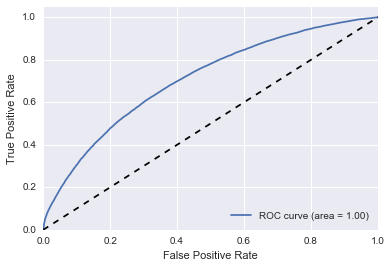

In [22]:
roc = roc_auc_score(y, model.predict(df))
%matplotlib inline
%pylab inline
#Lets plot model score to understand the area under the curve
fpr, tpr, thresholds= roc_curve(y, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Let's do a grid search on this
## Grid search

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


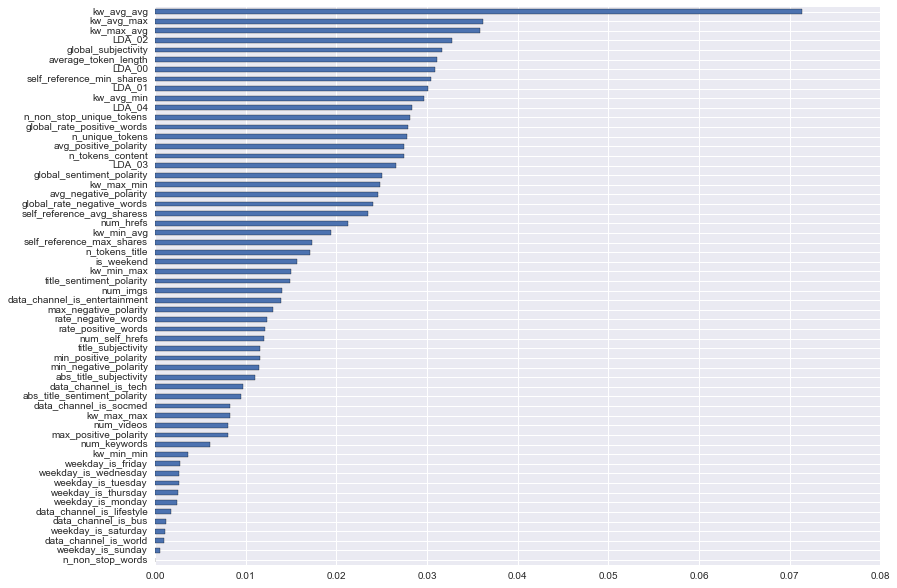

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(13,10));

In [25]:
#Since now it has become a classifier problem , let's use classifier instead.
modelC = RandomForestClassifier(500, oob_score=True, n_jobs=-1, random_state=42)
modelC.fit(df,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [26]:
modelC.oob_score_

0.66443850267379678

In [27]:
df.columns

Index([u'n_tokens_title', u'n_tokens_content', u'n_unique_tokens',
       u'n_non_stop_words', u'n_non_stop_unique_tokens', u'num_hrefs',
       u'num_self_hrefs', u'num_imgs', u'num_videos', u'average_token_length',
       u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sentiment_polarity', u'gl

Let's delete features to see if the score improves

In [28]:

del df['kw_min_max']
del df['weekday_is_monday']
del df['weekday_is_tuesday']
del df['weekday_is_wednesday']
del df['weekday_is_thursday']
del df['weekday_is_friday']
del df['weekday_is_saturday']
del df['weekday_is_sunday']
del df['data_channel_is_bus']
del df['n_non_stop_words']
del df['num_keywords']
del df['data_channel_is_lifestyle']       

In [29]:
from sklearn.grid_search import GridSearchCV
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7,9]
val=['True']

rfc = RandomForestRegressor(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              oob_score=val,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [30]:
estimator.estimator

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
modelFe=RandomForestRegressor(max_depth=None,
           max_features='auto',min_samples_leaf=1,
           min_samples_split=2,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=42)

In [32]:
modelFe.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [33]:
modelFe.oob_score_

0.14476761863260246

In [34]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [35]:
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.707328385019


# AUC is 70.7

Let's run logistic regression on this. 

In [54]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(penalty='l2',C=10)

In [55]:
model.fit(df , y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
from sklearn.metrics import r2_score
print "R^2:", model.score(df, y).round(2)

 R^2: 0.6


## I think I would go with Random Forest model without deleting the features. 

## C-stat:  0.708042600942
